**Percobaah 2: Penerapan Metode Fuzzy Tsukamoto dengan bahasa Python**

Terdapat dua buah variable input untuk studi kasus yang diambil pada jobsheet kali ini. Variabel input berupa kualitas kecepatan (velocity) dan jarak (distance) yang akan menentukan output berupa saran rem (brake). 


In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=2231ce9d71582f95b9d326d3e9440317ddd92d68a9148226de6f9a6a747b0ae7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


140.2588344466774


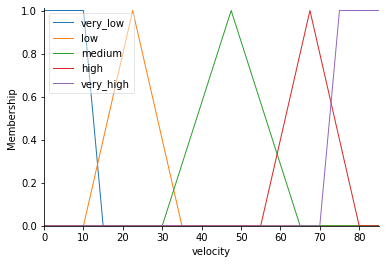

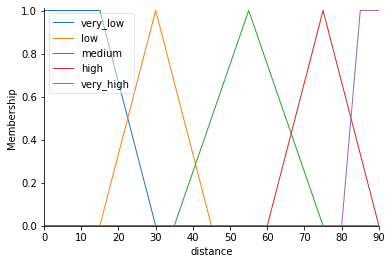

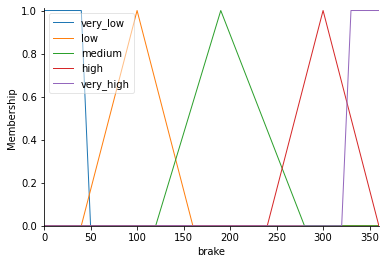

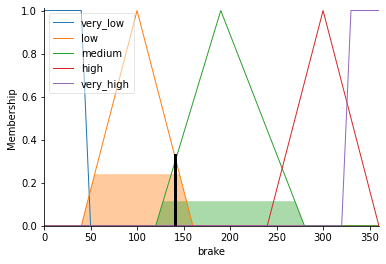

In [ ]:
"""-----------------------------------------------------------------------------
1. Untuk dapat membuat program fuzzy dengan Python diperlukan beberapa 
import library sebagai berikut
-----------------------------------------------------------------------------"""
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

"""-----------------------------------------------------------------------------
2. Tahap selanjutnya adalah generate variabel global. Untuk variabel input velocity berada 
pada rentang subjektif antara 0 sampai 85.5. Kemudian variable input distance berada 
pada rentang subjektif antara 0 sampai dengan 90.5. sedangkan untuk variabel output 
brake berada pada rentang subjektif antara 0 sampai 360.5
-----------------------------------------------------------------------------"""
# The universe of variables and membership functions
velocity = ctrl.Antecedent(np.arange(0, 85.5, 0.5), 'velocity')
distance = ctrl.Antecedent(np.arange(0, 90.5, 0.5), 'distance')
brake = ctrl.Consequent(np.arange(0, 360.5, 0.5), 'brake')

"""-----------------------------------------------------------------------------
3. Fungsi keanggotaan untuk masing-masing variabel (velocity, distance dan brake) pada 
studi kasus berikut akan dibagi menjadi “very low”, “low”, “medium”, “high” dan “very 
high”. 
-----------------------------------------------------------------------------"""
# Rules

velocity['very_low'] = fuzz.trapmf(velocity.universe, [0, 0, 10, 15])
velocity['low'] = fuzz.trimf(velocity.universe, [10, 22.5, 35])
velocity['medium'] = fuzz.trimf(velocity.universe, [30, 47.5, 65])
velocity['high'] = fuzz.trimf(velocity.universe, [55, 67.5, 80])
velocity['very_high'] = fuzz.trapmf(velocity.universe, [70, 75, 85, 85])

distance['very_low'] = fuzz.trapmf(distance.universe, [0, 0, 15, 30])
distance['low'] = fuzz.trimf(distance.universe, [15, 30, 45])
distance['medium'] = fuzz.trimf(distance.universe, [35, 55, 75])
distance['high'] = fuzz.trimf(distance.universe, [60, 75, 90])
distance['very_high'] = fuzz.trapmf(distance.universe, [80, 85, 90, 90])

brake['very_low'] = fuzz.trapmf(brake.universe, [0, 0, 40, 50])
brake['low'] = fuzz.trimf(brake.universe, [40, 100, 160])
brake['medium'] = fuzz.trimf(brake.universe, [120, 190, 280])
brake['high'] = fuzz.trimf(brake.universe, [240, 300, 360])
brake['very_high'] = fuzz.trapmf(brake.universe, [320, 330, 360, 360])

velocity.view()
distance.view()
brake.view()

"""-----------------------------------------------------------------------------
4. Terdapat beberapa rule dalam implementasi fuzzy studi kasus jobsheet ini. 
Rule tersebut dideklarasikan dalam kode berikut ini:
-----------------------------------------------------------------------------"""
rule1 = ctrl.Rule(velocity['very_low'] & distance['very_low'], brake['medium'])
rule2 = ctrl.Rule(velocity['very_low'] & distance['low'], brake['low'])
rule3 = ctrl.Rule(velocity['very_low'] & distance['medium'], brake['low'])
rule4 = ctrl.Rule(velocity['very_low'] & distance['high'], brake['very_low'])
rule5 = ctrl.Rule(velocity['very_low'] & distance['very_high'], brake['very_low'])

rule6 = ctrl.Rule(velocity['low'] & distance['very_low'], brake['high'])
rule7 = ctrl.Rule(velocity['low'] & distance['low'], brake['medium'])
rule8 = ctrl.Rule(velocity['low'] & distance['medium'], brake['low'])
rule9 = ctrl.Rule(velocity['low'] & distance['high'], brake['very_low'])
rule10 = ctrl.Rule(velocity['low'] & distance['very_high'], brake['very_low'])

rule11 = ctrl.Rule(velocity['medium'] & distance['very_low'], brake['very_high'])
rule12 = ctrl.Rule(velocity['medium'] & distance['low'], brake['high'])
rule13 = ctrl.Rule(velocity['medium'] & distance['medium'], brake['medium'])
rule14 = ctrl.Rule(velocity['medium'] & distance['high'], brake['low'])
rule15 = ctrl.Rule(velocity['medium'] & distance['very_high'], brake['very_low'])

rule16 = ctrl.Rule(velocity['high'] & distance['very_low'], brake['very_high'])
rule17 = ctrl.Rule(velocity['high'] & distance['low'], brake['high'])
rule18 = ctrl.Rule(velocity['high'] & distance['medium'], brake['high'])
rule19 = ctrl.Rule(velocity['high'] & distance['high'], brake['medium'])
rule20 = ctrl.Rule(velocity['high'] & distance['very_high'], brake['low'])

rule21 = ctrl.Rule(velocity['very_high'] & distance['very_low'], brake['very_high'])
rule22 = ctrl.Rule(velocity['very_high'] & distance['low'], brake['very_high'])
rule23 = ctrl.Rule(velocity['very_high'] & distance['medium'], brake['high'])
rule24 = ctrl.Rule(velocity['very_high'] & distance['high'], brake['medium'])
rule25 = ctrl.Rule(velocity['very_high'] & distance['very_high'], brake['low'])

"""-----------------------------------------------------------------------------
5. Berdasarkan aktivasi dari setiap fungsi keanggotaan yang telah diketahui. Maka aktivasi 
semua output tersebut harus digabungkan, untuk mendapatkan output sesuai dengan 
angka yang nyata (tidak fuzzy lagi). Sehingga diperlukan proses Deffuzyfikasi yang 
menyesuaikan dengan rule yang ada. Kode berikut digunakan untuk menampilkan hasil 
serta grafik yang berhubungan dengan studi kasus ini:
-----------------------------------------------------------------------------"""
brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                 rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

braking = ctrl.ControlSystemSimulation(brake_ctrl)

braking.input['velocity'] = 32
braking.input['distance'] = 56

braking.compute()

print(braking.output['brake'])

brake.view(sim=braking)

plt.show()

# **Pertanyaan**

---

1.) Jelaskan dengan detil tentang kode program pada Percobaan 2 diatas. Kemudian jelaskan pula nilai input berupa velocity dan distance, serta hasil outputnya

**Jawab:**
>- *Program pada percobaan 2 terdapat 2 variabel input berupa kualitas kecepatan (velocity) dan jarak (distance) yang akan menentukan output berupa saran rem (brake).* 
- *Kemudian pada kode program selanjutnya merupakan generate variabel global yang mana rentang subjektif setiap variabelnya berbeda. Variabel input velocity berada pada rentang subjektif antara 0 sampai 85.5. Kemudian variable input distance berada pada rentang subjektif antara 0 sampai dengan 90.5. sedangkan untuk variabel output brake berada pada rentang subjektif antara 0 sampai 360.5.*
- *Setelah itu kode program menjelaskan tentang fungsi keanggotaan masing-masing variabel untuk proses Fuzzyfikasi. Pada kode program yang terdapat rule1 sampai rule25 merupakan deklarasi rules dalam implementasi fuzzy studi kasus percobaan 2 ini untuk pembentukan basis pengetahuan Fuzzy. Kode program yang terakhir merupakan proses Mesin Inferensi untuk
mendapatkan nilai α-predikat tiap-tiap rule yang akan kemudian digunakan pada proses Deffuzyfikasi yaitu proses menyesuaikan dengan rule yang ada sehingga digunakan untuk menampilkan hasil yang nyata (tidak fuzzy lagi) yang divisualisasikan melalui grafik.*
- *Nilai input berupa velocity = 32 dan distance = 56, kemudian menghasilkan output brake berupa low dan medium dengan nilai tengahnya antara 100 – 150 (yaitu 140.2588344466774) seperti pada gambar di bawah ini.*
<img src="https://user-images.githubusercontent.com/64578787/134528409-c96e1dac-1066-489b-8f80-edb114f08b16.png" width="400">





2.) Lakukan kembali Percobaan 2 dengan input velocity dan distance yang berbeda, serta jelaskan pula hasil output yang diperoleh

**Jawab:**
> *input velocity = 25, input distance = 65 dalam kode berikut*

80.40913248659244


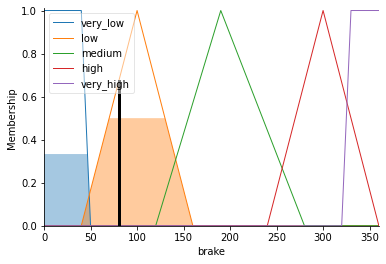

In [ ]:
#Jawaban Nomor 2
brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                 rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])

braking = ctrl.ControlSystemSimulation(brake_ctrl)

#input velocity = 25, distance = 65
braking.input['velocity'] = 25
braking.input['distance'] = 65

braking.compute()

print(braking.output['brake'])

brake.view(sim=braking)

plt.show()

3.) Jelaskan dengan detil tentang kode program mengenai visualisasi pada Percobaan 2 di atas!

**Jawab:**
> <img src="https://user-images.githubusercontent.com/64578787/134216151-f9107bda-801a-4f6f-9c41-487805b7c60f.png" width="400">
>
> *Kode program di atas digunakan untuk visualisasi atau menggambarkan 3 grafik yaitu grafik velocity, distance, dan brake dengan rentan nilai yang berbeda-beda dimana di setiap rentang nilai tersebut memiliki label sebagai level yang divisualisasikan dengan warna berbeda diantaranya: very low(biru), low(orange), medium(hijau), high(merah), dan very high(ungu).*
>
> <img src="https://user-images.githubusercontent.com/64578787/134215185-80f6530e-2f03-4f1a-a63c-f756db83ed69.png" width="500"> 
>
> *Sedangkan kode program berikut digunakan untuk visualisasi hasil defuzzyfikasi melalui input nilai 'velocity' dan 'distance' berdasarkan rule yang ditentukan (rule1 hingga rule25) yang menghasilkan aktivasi dari setiap fungsi keanggotaan. Lalu aktivasi semua output digabungkan sehingga mendapatkan hasil nilai brake yang tegas (tidak fuzzy lagi) sesuai rentang level yang ada dimana divisualisasikan dengan warna berbeda seperti penjelasan sebelumnya.*